In [1]:
from google.colab import drive
drive.mount('/content/drive')
#
%cd "/content/drive/MyDrive/IA/IA 2/Pruebas"
!ls

Mounted at /content/drive
/content/drive/MyDrive/IA/IA 2/Pruebas
 Examples   images  'Load model.ipynb'	 model.ipynb   poke.h5


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
import numpy as np
import os

In [3]:
# Etiquetas de cada clase corresponidente a los índices
labels = {
    0: 'anime',
    1: 'cartoon',
    2: 'human',
}

In [4]:
# Carga del modelo
model = load_model('poke.h5')

In [5]:
# Cargado de imagenes y guardado de predicciones
prediction = []
original = []
image = []
count = 0
examples_path = 'Examples'

# Recorre los tipos de ejemplos
for i in os.listdir(examples_path):
    # Recorre los elementos dentro de cada conjunto
    for item in os.listdir(os.path.join(examples_path, i)):
        # Carga de la imagen
        img = tf.keras.utils.load_img(os.path.join(examples_path, i, item), target_size=(200, 200))
        # Se guarda la imagen en un arreglo
        image.append(img)
        # Se realizan transformaciones a la imagen para que pueda ser utilizada
        img = np.array(img)
        ##img = img / 255.0
        # Se especifican las dimensiones
        img = img.reshape(1,200,200,3)
        # Predicción del modelo
        predict = model.predict(img)
        # Se obtiene el índice del valor más grande en la predicción
        predict = np.argmax(predict)
        # Se guarda el valor de ese índice en un arreglo
        prediction.append(labels[predict])
        # Se guarda la clase original para su comprobación
        original.append(i)

1/1 [==============================] - 1s 787ms/step


In [6]:
# Arreglo con numero de elementos predichos
n = []
for i in range(len(image)):
    n.append(i)

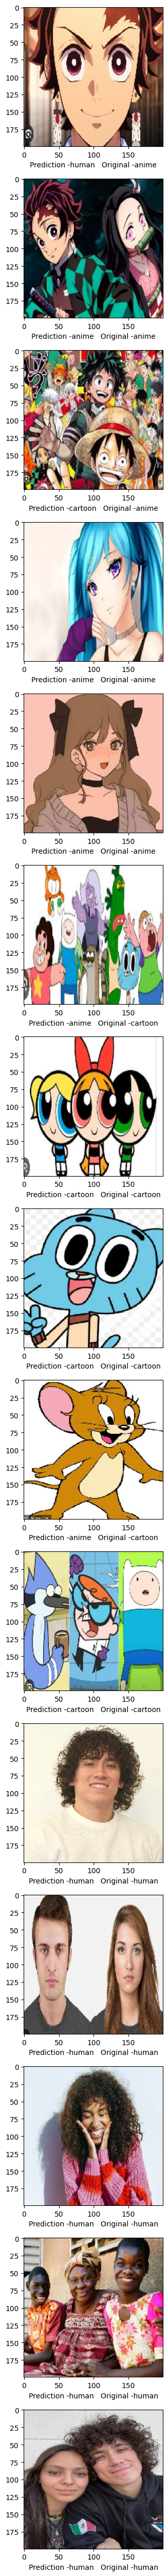

In [7]:
# Visualización de los resultados
fig = plt.figure(figsize = (100,100))

for i in range(len(n)):
    fig.add_subplot(30,1,i+1)
    plt.xlabel("Prediction -" + prediction[i] +"   Original -" + original[i])
    plt.imshow(image[i])
fig.tight_layout()
plt.show()